## Test role of alpha_star in fits

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140
import numpy as np
# our own modules
from lace.cosmo import camb_cosmo
from lace.likelihood import recons_cosmo
from lace.likelihood import linear_power_model

In [2]:
z_star=3.0
kp_kms=0.009

In [3]:
# specify k-range used in linP fits
fit_kmin_kp=0.5
fit_kmax_kp=2.0

In [4]:
# define test cosmology
cosmo_test=camb_cosmo.get_cosmology(omch2=0.14,As=1.8e-9)
camb_cosmo.print_info(cosmo_test)
camb_results_test=camb_cosmo.get_camb_results(cosmo_test,zs=[z_star])
linP_model_test=linear_power_model.LinearPowerModel(cosmo=cosmo_test,camb_results=camb_results_test,
                                                   fit_kmin_kp=fit_kmin_kp,fit_kmax_kp=fit_kmax_kp)
k_kms_test, _, linP_kms_test=camb_cosmo.get_linP_kms(cosmo_test,zs=[z_star],camb_results=camb_results_test)
linP_model_test.get_params()

H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 1.4000E-01, Omega_k = 0.0000E+00, Omega_nu h^2 = 0.0000E+00, A_s = 1.8000E-09, n_s = 9.6500E-01, alpha_s = 0.0000E+00


{'f_star': 0.9846126395700501,
 'g_star': 0.9734356494622979,
 'Delta2_star': 0.41134713314217125,
 'n_star': -2.278440757895284,
 'alpha_star': -0.2265465046945527}

In [5]:
# define fiducial cosmology
cosmo_fid=camb_cosmo.get_cosmology()
camb_cosmo.print_info(cosmo_fid)
camb_results_fid=camb_cosmo.get_camb_results(cosmo_fid,zs=[z_star],fast_camb=True)
linP_model_fid=linear_power_model.LinearPowerModel(cosmo=cosmo_fid,camb_results=camb_results_fid,
                                                  fit_kmin_kp=fit_kmin_kp,fit_kmax_kp=fit_kmax_kp)
k_kms_fid, _, linP_kms_fid=camb_cosmo.get_linP_kms(cosmo_fid,zs=[z_star],camb_results=camb_results_fid)
linP_model_fid.get_params()

H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 1.2000E-01, Omega_k = 0.0000E+00, Omega_nu h^2 = 0.0000E+00, A_s = 2.1000E-09, n_s = 9.6500E-01, alpha_s = 0.0000E+00


{'f_star': 0.9813416724266616,
 'g_star': 0.9677508579459803,
 'Delta2_star': 0.3603423347991143,
 'n_star': -2.299511628221449,
 'alpha_star': -0.21629042976377164}

(300.0, 1200.0)

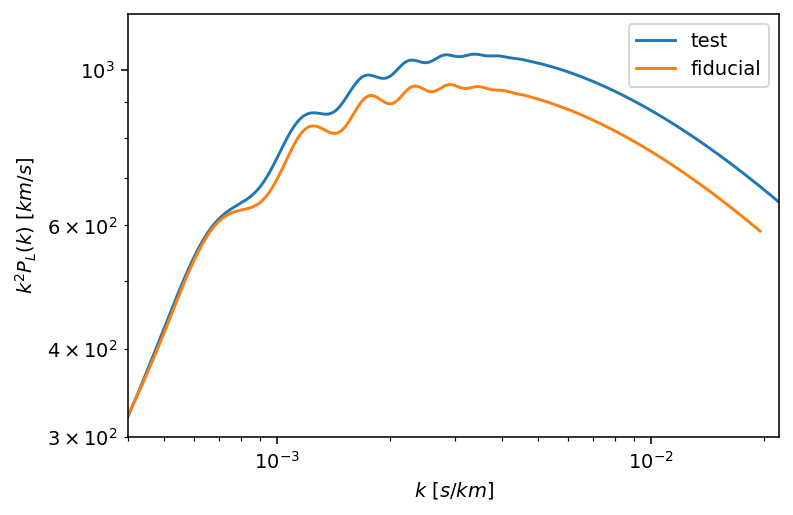

In [6]:
# compare linear power predictions (in s/km)
k_kms_test=k_kms_test[0]
linP_kms_test=linP_kms_test[0]
plt.loglog(k_kms_test,k_kms_test**2*linP_kms_test,label='test')
plt.loglog(k_kms_fid[0],k_kms_fid[0]**2*linP_kms_fid[0],label='fiducial')
plt.legend()
plt.xlabel(r'$k ~ [s/km]$')
plt.ylabel(r'$k^2 P_L(k) ~ [km/s]$')
plt.xlim([4.e-4,2.2e-2])
plt.ylim([3.e2,1.2e3])

In [7]:
recons=recons_cosmo.ReconstructedCosmology(zs=[z_star],emu_kp_Mpc=0.7,
                                    like_z_star=z_star,like_kp_kms=kp_kms,cosmo_fid=cosmo_fid,
                                    fit_kmin_kp=fit_kmin_kp,fit_kmax_kp=fit_kmax_kp)

In [8]:
linP_params_test=linP_model_test.get_params()

In [9]:
like_params_test=linP_model_test.get_likelihood_parameters()

In [10]:
linP_model_p2=recons.get_linP_model(like_params=like_params_test[2:4])
linP_model_p2.get_params()

{'f_star': 0.9813416724266616,
 'g_star': 0.9677508579459803,
 'Delta2_star': 0.41134713314217125,
 'n_star': -2.278440757895284,
 'alpha_star': -0.21629042976377164}

In [11]:
linP_model_p4=recons.get_linP_model(like_params=like_params_test[:4])
linP_model_p4.get_params()

{'f_star': 0.9846126395700501,
 'g_star': 0.9734356494622979,
 'Delta2_star': 0.41134713314217125,
 'n_star': -2.278440757895284,
 'alpha_star': -0.21629042976377164}

In [12]:
linP_model_p5=recons.get_linP_model(like_params=like_params_test)
linP_model_p5.get_params()

{'f_star': 0.9846126395700501,
 'g_star': 0.9734356494622979,
 'Delta2_star': 0.41134713314217125,
 'n_star': -2.278440757895284,
 'alpha_star': -0.2265465046945527}

In [13]:
for par in like_params_test:
    print(par.info_str())

g_star = 0.9734356494622979
f_star = 0.9846126395700501
Delta2_star = 0.41134713314217125
n_star = -2.278440757895284
alpha_star = -0.2265465046945527


In [14]:
linP_kms_p2=recons.reconstruct_linP_kms(iz=0,k_kms=k_kms_test,linP_model=linP_model_p2)
linP_kms_p4=recons.reconstruct_linP_kms(iz=0,k_kms=k_kms_test,linP_model=linP_model_p4)
linP_kms_p5=recons.reconstruct_linP_kms(iz=0,k_kms=k_kms_test,linP_model=linP_model_p5)

(300.0, 1200.0)

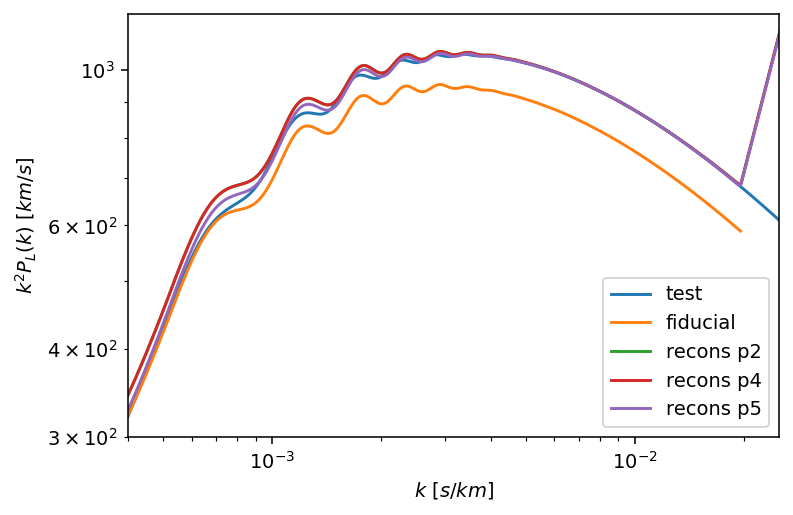

In [15]:
plt.loglog(k_kms_test,k_kms_test**2*linP_kms_test,label='test')
plt.loglog(k_kms_fid[0],k_kms_fid[0]**2*linP_kms_fid[0],label='fiducial')
plt.loglog(k_kms_test,k_kms_test**2*linP_kms_p2,label='recons p2')
plt.loglog(k_kms_test,k_kms_test**2*linP_kms_p4,label='recons p4')
plt.loglog(k_kms_test,k_kms_test**2*linP_kms_p5,label='recons p5')
plt.legend()
plt.xlabel(r'$k ~ [s/km]$')
plt.ylabel(r'$k^2 P_L(k) ~ [km/s]$')
plt.xlim([4.e-4,2.5e-2])
plt.ylim([3.e2,1.2e3])

(0.99, 1.01)

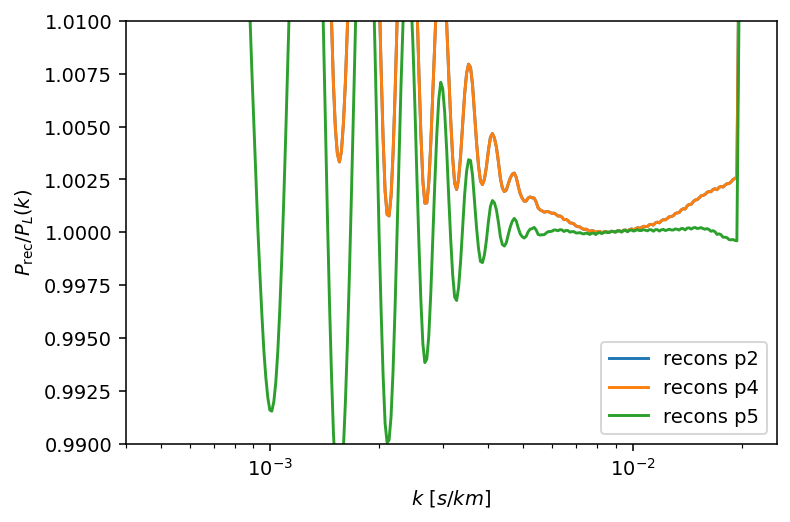

In [16]:
plt.semilogx(k_kms_test,linP_kms_p2/linP_kms_test,label='recons p2')
plt.semilogx(k_kms_test,linP_kms_p4/linP_kms_test,label='recons p4')
plt.semilogx(k_kms_test,linP_kms_p5/linP_kms_test,label='recons p5')
plt.legend()
plt.xlabel(r'$k ~ [s/km]$')
plt.ylabel(r'$P_{\rm rec} / P_L(k)$')
plt.xlim([4.e-4,2.5e-2])
plt.ylim([0.99,1.01])